Corporate Employee Attrition Analytics
Team ID : PNT2022TMID34476

Project Development Phase - Sprint - 2

AIM :

Explore , Visualise and Analyse the Dataset.

ABOUT NOTEBOOK:

NOTEBOOK SECTIONS:

DATA LOADING AND DATA INSIGHTS(SHAPE , COLUMNS ,INFORMATION),
DATA CLEANING (HANDLING NULL ,DROPPING IRRELEVANT FEATURES),
DATA VISUALISATION & PLOTTING CORRELATION HEATMAP.
FEATURE ENGINEERING (HANDING OUTLIERS ,REMOVING IRRELEVANT FEATURES)
CATEGORICAL VARIABLES ENCODING
HANDLING DATA IMBALANCE (SMOTE)
IMPORTING THE LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#FEATURE ENGINEERING
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
path  = '/content/general_data.csv'

df =pd.read_csv(path)
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


Exploratory Data Analysis


In [3]:
df.shape


(4410, 24)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
df.select_dtypes('int64' ,'float64').columns


Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:

cat_cols = df.select_dtypes('object').columns
cat_cols


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [8]:
df


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [9]:
for cat in cat_cols:
    print(cat ,'-> ' , df[cat].unique())
    print()


Attrition ->  ['No' 'Yes']

BusinessTravel ->  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department ->  ['Sales' 'Research & Development' 'Human Resources']

EducationField ->  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender ->  ['Female' 'Male']

JobRole ->  ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

MaritalStatus ->  ['Married' 'Single' 'Divorced']

Over18 ->  ['Y']



In [10]:
print("All columns Unique values count")
for col in df:
    print(col, len(df[col].unique()), sep=': ')
  

All columns Unique values count
Age: 43
Attrition: 2
BusinessTravel: 3
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeID: 4410
Gender: 2
JobLevel: 5
JobRole: 9
MaritalStatus: 3
MonthlyIncome: 1349
NumCompaniesWorked: 11
Over18: 1
PercentSalaryHike: 15
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 41
TrainingTimesLastYear: 7
YearsAtCompany: 37
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Attrition')

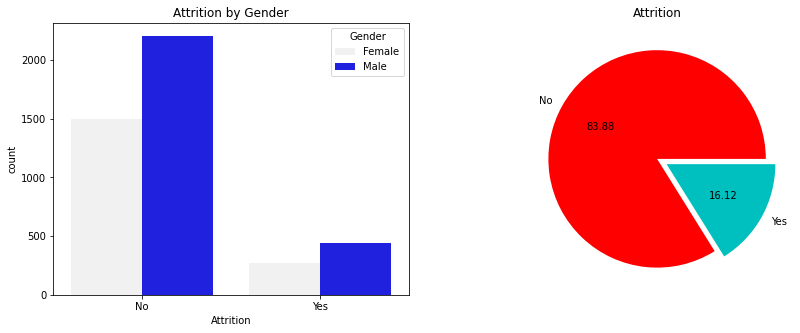

In [11]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot(df['Attrition'] ,color ='b' ,hue =df['Gender'])
plt.title('Attrition by Gender')
plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts() ,colors =['r' ,'c'] ,explode =[0,0.1]  ,autopct = '%.2f' ,labels =['No' ,'Yes'])

plt.title('Attrition')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


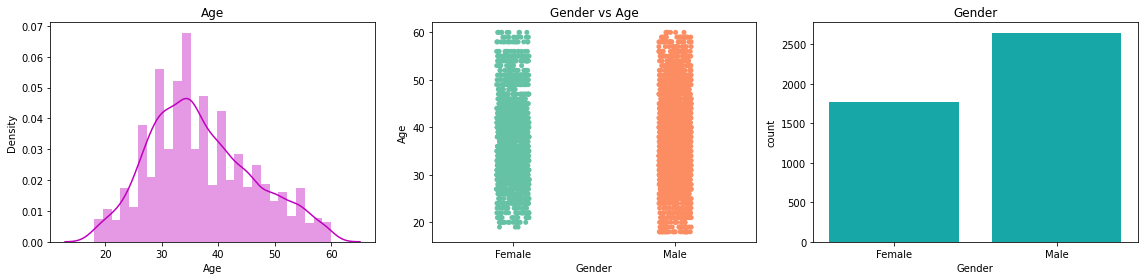

In [12]:
plt.figure(figsize =(16 ,4))
plt.subplot(1,3,1)
sns.distplot(df['Age'] ,color ='m')
plt.title('Age')
plt.subplot(1 , 3 ,2)
sns.stripplot(x = 'Gender' ,y = 'Age' ,data = df ,palette="Set2")
plt.title('Gender vs Age')
plt.subplot(1,3,3)
sns.countplot('Gender' ,data = df ,color ='c')
plt.title('Gender')
plt.tight_layout()

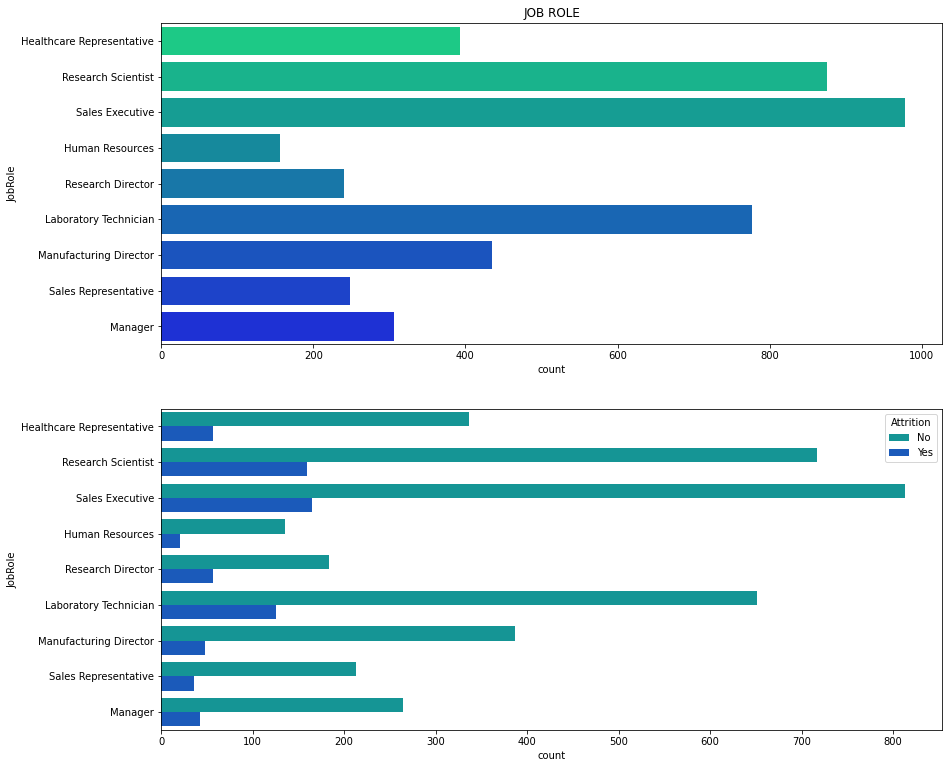

In [13]:
plt.figure(figsize = (14 , 13))
plt.subplot(2 ,1,1)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r'  ,hue =df['Attrition'])

In [14]:
#HANDLING CATEGORICAL OUTPUT VARIABLE
df['Attrition'].replace({'Yes':1 ,'No':0} ,inplace = True)
df['Attrition'].head()


0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

KeyError: ignored

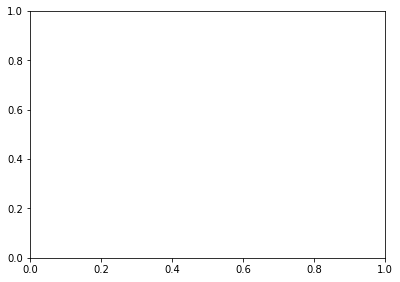

In [16]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['JobSatisfaction'] ,hue =df['Attrition'] ,palette='Accent_r')
plt.subplot(2,2,2)
sns.countplot(df['EnvironmentSatisfaction'] ,hue =df['Attrition'] ,palette='Accent')
plt.subplot(2,2,3)
sns.countplot(df['JobInvolvement'] ,hue =df['Attrition'] ,palette='brg_r')
plt.subplot(2,2,4)
sns.countplot(df['PerformanceRating'] ,hue =df['Attrition'] ,palette='twilight_r')



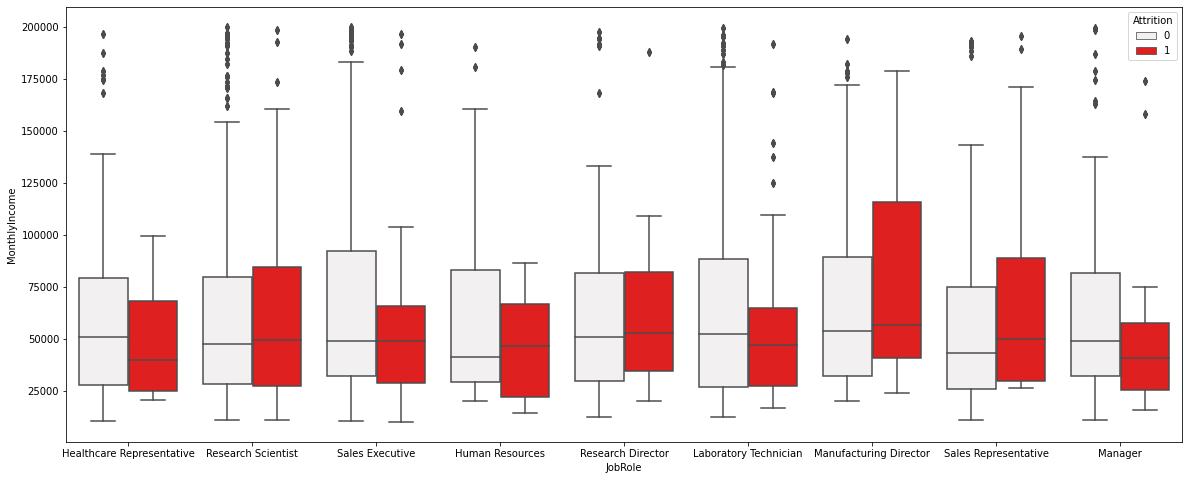

In [17]:
plt.figure(figsize =(20 ,8))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome' ,data = df ,hue ='Attrition' ,color ='red')

ValueError: ignored

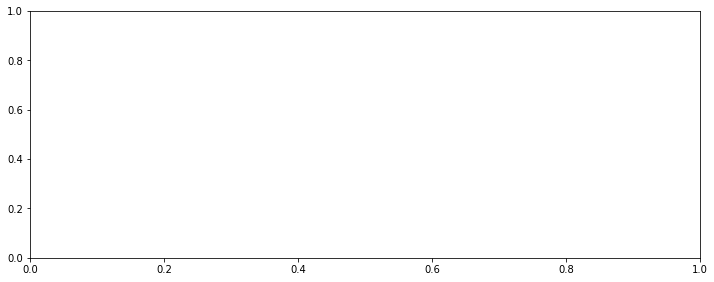

In [18]:
plt.figure(figsize =(12,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'MaritalStatus' ,y ='RelationshipSatisfaction' ,data = df ,hue = 'Attrition', color = 'g')
plt.subplot(2,1,2)
sns.boxplot(df['JobLevel'],df['MonthlyIncome'] ,hue = df['Attrition'] ,palette='Reds_r')

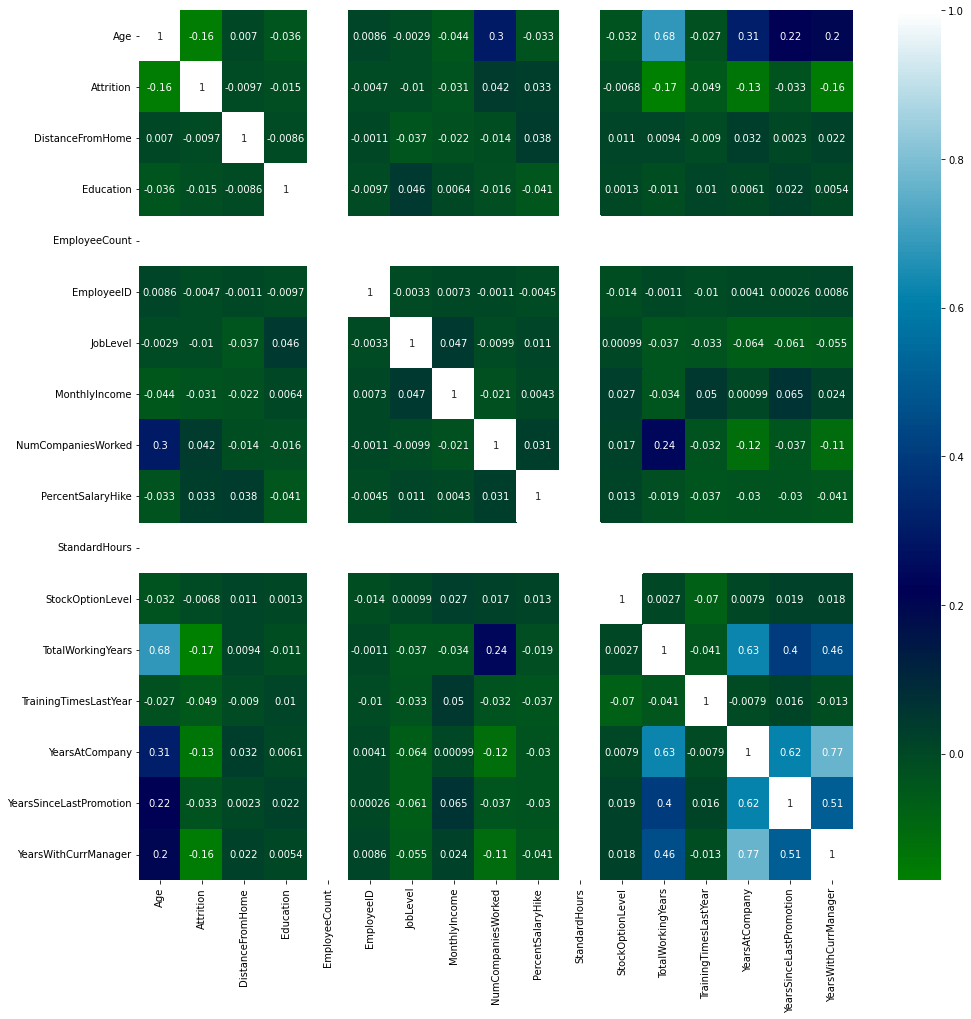

In [19]:
plt.figure(figsize = (16 ,16))
sns.heatmap(df.corr() ,cmap = 'ocean' , cbar = True , annot = True)


In [20]:
no_use = []
for col in df.columns:
    if(len(df[col].unique()) ==1):
        no_use.append(col)
no_use

['EmployeeCount', 'Over18', 'StandardHours']

In [21]:
df.drop(columns = no_use , axis = 1 , inplace = True)


In [22]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

BINARY FEATURES ENCODING


In [23]:
y_n_type = []
others =[]
for col in df.select_dtypes('object').columns:
    if(len(df[col].unique()) ==2):
        y_n_type.append(col)
        
y_n_type

['Gender']

In [24]:
df['Gender'].replace({'Male':1 ,'Female':0} ,inplace = True)
df['OverTime'].replace({'Yes':1 ,'No':0} ,inplace = True)

KeyError: ignored

In [25]:
others = df.select_dtypes('object').columns
others

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [26]:
le = LabelEncoder()
for col in others:
    df[col] = le.fit_transform(df[col])

In [27]:
df.select_dtypes('object').columns


Index([], dtype='object')

In [28]:
x = df.drop('Attrition' ,axis =1)
y = df['Attrition']

print(x.shape ,y.shape)

(4410, 20) (4410,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


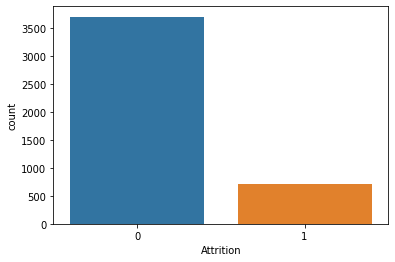

In [29]:
sns.countplot(df['Attrition'])


In [30]:
(df.Attrition.value_counts()/1470)*100


0    251.632653
1     48.367347
Name: Attrition, dtype: float64

In [31]:
smote = SMOTE(sampling_strategy='minority')
x ,y = smote.fit_resample(x ,y)

print(x.shape ,y.shape)

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Now Class is Balanced')

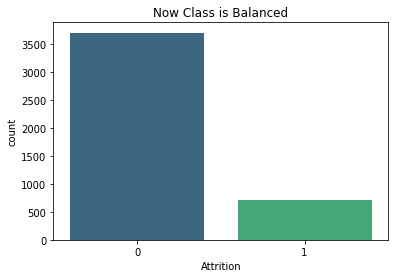

In [32]:


#now balanced
y.value_counts()
sns.countplot(y ,palette='viridis')
plt.title('Now Class is Balanced')